# Grundler et al. 2025 - `gaia`

`gaia` offers a parsimony-based approach for estimating ancestral locations. This package is written in R, but has been ported to Python with the `gaiapy` package (installed as `geoancestry`). Let's load up our example simulated ARG.

In [1]:
import gaiapy as gp
import tskit
import numpy as np
import matplotlib.pyplot as plt

ts = tskit.load("continuous_space_ten_samples.trees")
ts_simple = ts.simplify()

`gaia` was designed to run on the simplified ARG, similar to Wohns et al. Below we create a `numpy` array that holds the sample locations.

In [2]:
spatial_dimensions = 2
sample_locations = np.zeros((ts.num_samples, spatial_dimensions+1))
for sample in ts.samples():
    location = ts.individual(ts.node(sample).individual).location
    sample_locations[sample] = np.array([sample, location[0], location[1]])
print(sample_locations)

[[ 0.         87.93595089 50.78275134]
 [ 1.         63.71522376 56.47398252]
 [ 2.         21.41498024 26.20901172]
 [ 3.          0.21672895 55.25619718]
 [ 4.         18.82533252 87.65092069]
 [ 5.         59.18223944 78.4027799 ]
 [ 6.         27.95544429 94.73601188]
 [ 7.         73.33354253 28.57466078]
 [ 8.         99.87559747 12.89871406]
 [ 9.         19.47314364 81.30175604]]


There are a few different reconstruction methods within `gaia` which use different measures of best fit. `gp.quadratic_mpr()` minimizes the sum of squared Euclidean distances to position the nodes. In this example, we are using the optional parameter `use_branch_lengths=True` which takes into account the timing of nodes and how long the connecting edges are. It's also worth pointing out that `gaia` uses the edge span (the size of the chromosome region that the edge corresponds with) to determine node positions. This differs from the other methods mentioned in this workshop, and we will come back to the impact of this later on.

In [11]:
mpr_quad = gp.quadratic_mpr(ts_simple, sample_locations, use_branch_lengths=True)
locations_quad = gp.quadratic_mpr_minimize(mpr_quad, preserve_sample_locations=True)
print("Node positions:")
print(locations_quad)

Node positions:
[[87.93595089 50.78275134]
 [63.71522376 56.47398252]
 [21.41498024 26.20901172]
 [ 0.21672895 55.25619718]
 [18.82533252 87.65092069]
 [59.18223944 78.4027799 ]
 [27.95544429 94.73601188]
 [73.33354253 28.57466078]
 [99.87559747 12.89871406]
 [19.47314364 81.30175604]
 [19.16955035 84.35914723]
 [21.29827477 72.07751991]
 [20.31858774 64.39898193]
 [67.11224957 55.33252532]
 [22.18242332 60.10563266]
 [76.03301568 38.46177621]
 [70.62867809 47.81610584]
 [71.25049473 46.48696328]
 [67.31624016 49.37787093]
 [52.68389972 52.85196551]]


Just like with the midpoint method, we can plot these to track lineages back in time. A major difference that we see with `gaia` is that node positions are affected by connections above them in the ARG. This is best shown with the lineages above Samples 1 and 5, where the coalescent nodes are positioned slightly to the right of the midpoint of the sample locations.

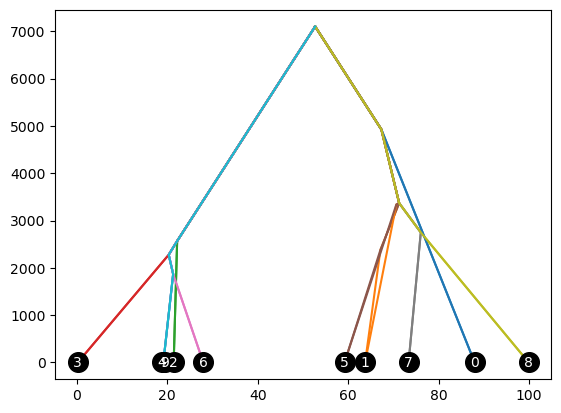

In [12]:
for tree in ts_simple.trees():

    for sample in ts_simple.samples():
    
        node = sample
        
        x_positions = [locations_quad[node][0]]
        y_positions = [locations_quad[node][1]]
        times = [tree.time(node)]
    
        node = tree.parent(node)
        while node != -1:
            x_positions.append(locations_quad[node][0])
            y_positions.append(locations_quad[node][1])
            times.append(tree.time(node))
            node = tree.parent(node)
    
        plt.plot(x_positions, times)

for sample in ts_simple.samples():
    plt.scatter(locations_quad[sample][0], ts_simple.node(sample).time, s=200, color="black", zorder=2)
    plt.annotate(sample, (locations_quad[sample][0], ts_simple.node(sample).time), ha="center", va="center", color="white")

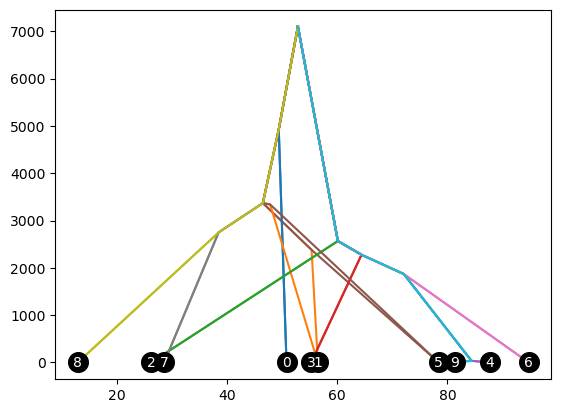

In [13]:
for tree in ts_simple.trees():

    for sample in ts_simple.samples():
    
        node = sample
        
        x_positions = [locations_quad[node][0]]
        y_positions = [locations_quad[node][1]]
        times = [tree.time(node)]
    
        node = tree.parent(node)
        while node != -1:
            x_positions.append(locations_quad[node][0])
            y_positions.append(locations_quad[node][1])
            times.append(tree.time(node))
            node = tree.parent(node)
    
        plt.plot(y_positions, times)

for sample in ts_simple.samples():
    plt.scatter(locations_quad[sample][1], ts_simple.node(sample).time, s=200, color="black", zorder=2)
    plt.annotate(sample, (locations_quad[sample][1], ts_simple.node(sample).time), ha="center", va="center", color="white")